# CaliDHRI Day 2: Afternoon

## Topic Modeling with Gensim

Topic modeling is a popular approach to "distant reading" a corpus. It is a kind of unsupervised machine learning. Unlike in supervised methods where the human provides labeled training data from which the machine learns, in unsupervised machine learning, the machine learns from unlabeled data. There are benefits and drawbacks to both approaches. Topic modeling is a useful tool for understanding the subject matter of a dataset -- sometimes one that is too large for close reading or as a supplement to close reading.

We will be doing LDA topic modeling. LDA stands for latent Dirichlet allocation. Don't get hung up on the terminology! 

### Topics are probabilities of aboutness

Here's how the basic logic of LDA topic modeling works:
* Start with a corpus of documents with any pre-processing/cleaning done.
* Represent each document as a bag-of-words. In the BOW model, word order is lost and it just matters that the word occured within the bag (document).
* The BOWs are represented as a term-document matrix consisting of columns and rows for each word's occurance.
* The term-document matrices are fed to the algorithm. Each word in each document is compared (Is Word1 in Bag1? Yes. Is Word1 in Bag2? Yes. Is Word1 in Bag3? No. Is Word2 in Bag1? No. Is Word2 in Bag2? Yes. Is Word2 in Bag3? No. And so on.)
* The computer learns from this process which words are likely to occur within the same document. The logic of LDA is that words that co-occur within a document are likely about the same thing.
* The algorithm generates topics, which are probablistic groupings of words that are likely to co-occur within the corpus. 
* The algorithm does not tell you want the topics are about and it does not name the topics. That's up to the human!

## Set up

In this notebook, we'll be using several libraries to prepare text from The Liberator for the algorithm, create topic models, and visualize the topics:
* NLTK: data preparation
* Gensim: topic modeling
* Altair: visualization
* ipywidgets: visualization
* Matplotlib: visualization


These are already installed on JupyterHub, but if you were working locally, you'd want to make sure you installed them before trying to use them in your notebook. 

## The data 

Here are the modules we'll use to load our data into the notebook:
* Glob

The import statements below will make them available for us to use in our notebook.

In [1]:
import glob

Now we need to direct the notebook to the 187 files of the Liberator we'll be topic modeling. Each file is an issue of the Liberator. We haven't done any cleaning of the OCR for these files. 

Learn more about the Liberator in [these slides](https://docs.google.com/presentation/d/1gwAISOnn3Evq_LkX_0vhsYy0iTv7s5GHLUEGVKzN-tc/edit?usp=sharing). 

First we create a variable called directory_path, and we set that to the directory name where our files are stored. Then we can use glob, a handy module to navigate a directory structure, to set all of the files under directory_path to another variable called text files.

In [2]:
directory_path = 'libSeparate'
text_files = glob.glob(f"{directory_path}/*")

Let's check to see that the files were brought in. We can use the list index to call the first text file. 

In [3]:
# change the number in the brackets to see a different file
text_files[0]

'libSeparate/1912-08-02.txt'

The next step is to take those text files and make them into a Python list. First we create an empty list, listOfLib, and using a for loop, we iterate through the files in text_files, opening and reading them, and then apending them to listOfLib.

In [4]:
listOfLib = []
for i in text_files:
    try:
        with open(i) as f:
            listOfLib.append(f.read())
    except:
        pass

Let's check to make sure we got all the files. We can use the notation len() to see the length of both text_files and listOfLib are. The length is the number of items in the list. 

In [5]:
len(text_files)

101

In [6]:
len(listOfLib)

101

With the data now stored in our listOfLib, we can also call each of the items in the list using the notation below. The first brackets refer to a specific item in our list, in this case the 10th item. (Python starts counting at 0.) The second brackets are optional, and they are restricting what is returned to a slice of the data--characters 0 to 300. If we didn't slice, then we'd return the text of one entire issue of the Liberator. 

In [7]:
listOfLib[9][0:300]

'THE LIBERATOR \n\nA Weekly Newspaper Devoted to the Cause of Good Government and the Advancement of the American Negro. \nVol. X 5 cts. a copy LOS ANGELES, CAL., MAY 3, 1912 $1.50 a year No. 24 \n\n\nDr. James E. Shepard Greeted by a Great \nOutpouring: of the People \n\n\n\nDr. James E. Shepard \n\nWesley Chape'

## Prepare the data

Once the data is loaded and in our listOfLib, then we can move to preparing it for analysis. We are going to remove the stopwords, tokenize, and lemmatize the text. For this we will utilize NLTK's built-in stopwords, tokenizer, and lemmatizer. 

We import the NLTK modules below, plus a module called punctuation that will allow us to remove punctuation from the text. 

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

Let's check out the NLTK stopword list. 

In [9]:
standardStop = stopwords.words('english')
print (standardStop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

The standard stopwords may not be sufficient for the text we will analysis from the Liberator. We can add stopwords by creating a list called extraStop that we will combine with the standard list in a new list. The new list will be called myStopWords, and it combines the punctuation marks, standardStop, and extraStop lists. 

In [10]:
extraStop = ['``',"''","'re","'s","'re",'``',"''","'ll","--","\'\'","...", "n\'t",'one','would','use','subject','from',
             "\'m","\'ve", "los", "angeles", "liberator", "phone", "street", "mrs."]

In [11]:
myStopWords = list(punctuation) + standardStop + extraStop

In [12]:
print(myStopWords)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when'

Now we'll create a function to tokenize and lemmatize the text. As you'll remember from this morning, lemmatization groups together forms of a word.  

Let's take note of all the preprocessing happening in this function:

* We create 2 empty lists called listOfLibWords and allLibWords
* Then, in a for loop, we go through each of the Liberators stored in our listOfLib and...
    * For ever word, we lowercase and tokenize it if it is not on myStopWords and it has more than 3 letters
    * The tokens are stored in a temporary list called processedText
    * We append the processedText list to the listOfLibWords
* And in another for loop, we go through each token in processedText and add it to the allLibWords list

In [13]:
listOfLibWords = []
allLibWords = []
for i in listOfLib:
    processedText = [w for w in word_tokenize(i.lower()) if w not in myStopWords and len(w) > 3]
    listOfLibWords.append(processedText)
    for token in processedText:
        allLibWords.append(token)

Then we need to lemmatize the tokens in allLibWords. We'll create yet another empty list called listOfLemWords. We'll name a variable wordnet_lemmatizer and set it to NLTK's WordNetLemmatizer. Then in another for loop, we'll iterate through the tokens in listOfLibWords and add them to listOfLemWords once they have been lemmatized.

In [14]:
listOfLemWords = []
wordnet_lemmatizer = WordNetLemmatizer()
for i in listOfLibWords:
    listOfLemWords.append([wordnet_lemmatizer.lemmatize(w) for w in i])

Let's take a look at a slice of tokens from list item 6.

In [19]:
listOfLemWords[6][0:25]

['weekly',
 'newspaper',
 'devoted',
 'cause',
 'good',
 'government',
 'advancement',
 'american',
 'negro',
 'copy',
 'cal.',
 'oct.',
 '1912',
 '1.50',
 'year',
 'door',
 'hope',
 'closed',
 'negro',
 'progress',
 'sive',
 'party',
 'thoughtful',
 'negro',
 'reason']

## Create the bag-of-words

Gensim expects the data in a certain format in order to do topic modeling. First, we need to create a Python dictionary from our list of words. Then we need to translate the dictionary into a bag-of-words. 

But before any of that, we need to import Gensim and the corpora and models modules.

In [20]:
import gensim
from gensim import corpora

Now we can define a variable called dictionary. Gensim's corpora module will map the words in each document to integer IDs, in other words, assigning each unique word in the corpus a corresponding number.

In [21]:
dictionary = corpora.Dictionary(listOfLemWords) 

We can check the ID of any token an our corpus. 

In [22]:
#try looking up another word to find its ID
print(dictionary.token2id['broadway'])

213


Then, we define a new variable called corpus. Gensim has a module called doc2bow that will convert a document into the bag-of-words format. The BOW will be a list of tuples -- consisting of word ID and frequency pairs -- that represent each document in our corpus. 

In [23]:
corpus = [dictionary.doc2bow(text) for text in listOfLemWords]

In [24]:
print(corpus[9][0:300])

[(3, 2), (4, 1), (5, 1), (7, 1), (9, 1), (11, 5), (12, 1), (13, 1), (15, 1), (18, 1), (24, 1), (28, 1), (29, 1), (30, 3), (31, 2), (33, 1), (34, 2), (35, 1), (38, 1), (39, 1), (45, 1), (46, 1), (47, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (56, 1), (58, 1), (60, 1), (61, 1), (62, 1), (73, 1), (74, 1), (75, 3), (80, 1), (81, 1), (85, 3), (87, 2), (88, 1), (91, 1), (94, 1), (95, 4), (96, 1), (98, 1), (101, 1), (102, 1), (103, 5), (104, 1), (105, 3), (108, 6), (109, 2), (116, 2), (118, 1), (119, 1), (124, 1), (131, 1), (133, 1), (134, 1), (148, 1), (151, 1), (155, 2), (158, 1), (160, 5), (162, 4), (164, 1), (166, 3), (167, 1), (173, 2), (176, 1), (177, 1), (180, 1), (182, 4), (183, 2), (186, 1), (192, 3), (193, 1), (195, 3), (196, 3), (197, 1), (199, 7), (200, 1), (201, 1), (203, 2), (205, 1), (212, 1), (213, 12), (214, 1), (216, 3), (218, 3), (223, 5), (228, 1), (231, 1), (232, 3), (234, 3), (235, 5), (241, 2), (244, 2), (247, 1), (250, 3), (252, 5), (259, 1), (261, 2), 

## Run the model and view topics

Gensim has a module called models for LDA topic modeling. We'll import the models module and then create our topics. 

In [25]:
from gensim import models

There are parameters that we have the option to set when creating the topic model. We're using just couple here:

* num_topics: the number of topics our model will create. This is a parameter you can adjust based on your corpus size and the length of the documents. We are starting with 10 topics.
* passes: the number of times the algorithm will pass through the documents. A higher number is likely to yield higher quality topics, but will take more time to run. 

You can find the full list of available parameters on this webpage: https://radimrehurek.com/gensim/models/word2vec.html. 

In [26]:
lda_model = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=10, 
                                           id2word = dictionary, 
                                           passes=20)

The notation show_topics() will return the 10 most salient words in each of our topics. 

In [27]:
lda_model.show_topics()
#try adding a topic number (e.g., 5) and topn= 20 to see twenty words in topic 5, for example show_topics(9, topn=20)

[(0,
  '0.004*"anarchist" + 0.003*"5.00" + 0.003*"jackson" + 0.003*"law" + 0.003*"afro-american" + 0.002*"white" + 0.002*"taft" + 0.002*"anarchy" + 0.002*"murder" + 0.002*"sister"'),
 (1,
  '0.011*"negro" + 0.007*"main" + 0.006*"colored" + 0.005*"city" + 0.004*"home" + 0.004*"people" + 0.004*"state" + 0.004*"race" + 0.004*"vote" + 0.004*"office"'),
 (2,
  '0.003*"negro" + 0.003*"vote" + 0.003*"black" + 0.002*"prohibition" + 0.002*"grand" + 0.002*"main" + 0.002*"cent" + 0.002*"voter" + 0.002*"woman" + 0.002*"atlanta"'),
 (3,
  '0.000*"main" + 0.000*"colored" + 0.000*"negro" + 0.000*"white" + 0.000*"good" + 0.000*"home" + 0.000*"city" + 0.000*"office" + 0.000*"people" + 0.000*"state"'),
 (4,
  '0.000*"colored" + 0.000*"negro" + 0.000*"city" + 0.000*"home" + 0.000*"main" + 0.000*"every" + 0.000*"white" + 0.000*"good" + 0.000*"business" + 0.000*"race"'),
 (5,
  '0.002*"conference" + 0.002*"blanchard" + 0.002*"arnette" + 0.002*"marshall" + 0.001*"snelson" + 0.001*"earner" + 0.001*"mudge" + 

The code below will print a cleaner view of the top 20 words in our topics.

In [28]:
for i in range(10):
    print('Topic '+str(i))
    for j in lda_model.show_topic(i, topn=20):
            print(j[0])
    print('\n')

Topic 0
anarchist
5.00
jackson
law
afro-american
white
taft
anarchy
murder
sister
president
committee
riverside
life
southern
south
anarchical
vigilance
race
jury


Topic 1
negro
main
colored
city
home
people
state
race
vote
office
every
good
white
year
voter
business
company
broadway
first
south


Topic 2
negro
vote
black
prohibition
grand
main
cent
voter
woman
atlanta
office
murdered
child
miller
state
every
colored
without
atty
troy


Topic 3
main
colored
negro
white
good
home
city
office
people
state
business
race
work
every
first
broadway
make
life
made
store


Topic 4
colored
negro
city
home
main
every
white
good
business
race
south
make
pasadena
work
people
year
made
time
broadway
office


Topic 5
conference
blanchard
arnette
marshall
snelson
earner
mudge
realty
columbus
distinguished
mosely
shumpert
holly
gussie
sawtelle
artesian
sphere
herring
technicality
feared


Topic 6
ford
vote
stanton
cure
pendleton
sol
adcock
support
hall
republican
anthony
democrat
cattle
rally
lane
mo

## Visualize topics

Visualizing our topics will help us make sense of them. The code blocks below are a bit more complicated than what we saw above. 

First, let's import the modules we'll use in this section. 

* Altair: visualization library for Python
* ipywidgets: will make our visualizations interactive
* Pandas: common Python library for data science that is useful when working with tabular data
* Matplotlib: a very popular Python visualization library
* Seaborn: another Python visualization library 

Where you see the statements written "import ______ as ____", that's a way to abbreviate a module's name, mostly for the convenience of not typing the full name later. The abbreviations used here are common, so you may seem them if you look at other code in the future. 

In [29]:
import altair as alt
import ipywidgets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pyLDAvis is another frequently used Python library for visualizing the outputs of Gensim topic models. The code is a bit simpler than what we're using here, but we think these custom visualizations are nicer! If you wanted to use pyLDAvis, you'd need to run:

In [30]:
#import pyLDAvis
#import pyLDAvis.gensim_models
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, id2word, mds="mmds", R=30)
#vis

Let's get back to our visualiations. First we want to create a list of just the tokens in the topics. 

Here's what's happening below:
* Create a variable called topics and set it to show_topics
* Create an empty list called topic_words
* Iterate through topics and append the tokens to the topic_words list

At the end, we print topic_words

In [31]:
topics=lda_model.show_topics(5, 10,formatted=False)
topic_words = []
for topic in topics:
    topic_words.append([wd[0] for wd in topic[1]])
print(topic_words)

[['negro', 'white', 'colored', 'city', 'people', 'race', 'good', 'every', 'south', 'home'], ['negro', 'main', 'colored', 'city', 'home', 'people', 'state', 'race', 'vote', 'office'], ['ford', 'vote', 'stanton', 'cure', 'pendleton', 'sol', 'adcock', 'support', 'hall', 'republican'], ['anarchist', '5.00', 'jackson', 'law', 'afro-american', 'white', 'taft', 'anarchy', 'murder', 'sister'], ['negro', 'vote', 'black', 'prohibition', 'grand', 'main', 'cent', 'voter', 'woman', 'atlanta']]


Then, we want to create a Pandas dataframe from our corpus. Try not to worry to much about the syntax below, which mixes in Pandas syntax that we haven't yet seen. The important thing to know is that we are creating a dataframe, which you can think about like superpowered, code-accessible spreadsheet. Our dataframe will include the probability for each topic in each file in our corpus. 

In [32]:
ntopics = 10
dftopics = pd.DataFrame({'corpus':corpus})
filenames = []
topiclist = []
topicprob = []
topiccorpus = []
for i,row in dftopics.iterrows():
    probs = [0]*ntopics
    for t in lda_model.get_document_topics(row['corpus']):
        probs[t[0]] = t[1]
    for j in range(ntopics):
        topiccorpus.append('file'+str(i))
        topiclist.append(j)
        topicprob.append(probs[j])
topic_dataframe = pd.DataFrame({'corpus':topiccorpus,'topic':topiclist,'prob':topicprob})

If we call the dataframe, then we can get a feel for the tabular format.

In [33]:
topic_dataframe

,corpus,topic,prob
0,file0,0,0.000000
1,file0,1,0.941574
2,file0,2,0.000000
3,file0,3,0.000000
4,file0,4,0.000000
...,...,...,...
1005,file100,5,0.000000
1006,file100,6,0.000000
1007,file100,7,0.661729
1008,file100,8,0.000000


Next we can sort the dataframe so that it goes in ascending order by topic and probability. 

In [34]:
topic_dataframe = topic_dataframe.sort_values(by=['topic','prob'],ascending=[True,False])

The following code is a lot to digest, but it will take our dataframe and generate an interactive visualization showing the dispersion of topics within our issues of the Liberator. 

In [35]:
ntopics = 10
numwords = 10
selection = alt.selection_single(on='mouseover',fields=['topic'], bind='legend')
selopac = alt.selection_single(on='mouseover',fields=['topic'],bind='legend')
def topicbars(Topic):
    a = Topic
    topics_df_sorted = topic_dataframe[topic_dataframe['topic']==a].sort_values(by=['topic','prob'],ascending=False)
    topics_df_sorted = topics_df_sorted.append(topic_dataframe[topic_dataframe['topic']!=a])

    x=lda_model.show_topics(num_topics=ntopics, num_words=numwords,formatted=False)
    topic_words = []
    for topic in x:
        topic_words.append([wd[0] for wd in topic[1]])
    topics_df_sorted['topicwords'] = ''
    for i,row in topics_df_sorted.iterrows():
        topics_df_sorted.loc[i,'topicwords'] = ', '.join(topic_words[row['topic']])
    print("\n"+', '.join(topic_words[Topic])+"\n")
    
    chart = alt.Chart(topics_df_sorted).mark_bar().encode(
        x = 'sum(prob)',
        y = alt.X('corpus',sort=None),
        color = alt.Color('topic:N'),
        order = alt.Order('corpus'),
        opacity=alt.condition(selopac, alt.value(1), alt.value(0.5)),
        tooltip=['corpus', 'topic', 'prob', 'topicwords']
    ).add_selection(selopac)
        
    return chart

ipywidgets.interact(topicbars,Topic=range(ntopics))

interactive(children=(Dropdown(description='Topic', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), value=0), Output()…

<function __main__.topicbars(Topic)>

Then we can modify our dataframe so that topic is now rendered as a column. This will set us up for another visualization that will show how prevalent each topic is in each issue of the Liberator. 

In [36]:
topic_dataframe.pivot(index='corpus',columns='topic',values='prob')

topic,0,1,2,3,4,5,6,7,8,9
corpus,,,,,,,,,,
file0,0.0,0.941574,0.0,0.0,0.0,0.0,0.0,0.000000,0.058123,0.0
file1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.991848,0.000000,0.0
file10,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.825630,0.174103,0.0
file100,0.0,0.338061,0.0,0.0,0.0,0.0,0.0,0.661729,0.000000,0.0
file11,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.999778,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
file95,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.999640,0.0
file96,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.381734,0.617961,0.0
file97,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.999716,0.000000,0.0


Let's integrate that code above into the code below to create a new dataframe where the words in each topic will now be brought in, instead of the topic number. Then we'll call the new dataframe. 

In [37]:
ntopics = 10
numwords = 10

df_topic_words = topic_dataframe.pivot(index='corpus',columns='topic',values='prob')

x=lda_model.show_topics(num_topics=ntopics, num_words=numwords,formatted=False)
topic_words = []
for topic in x:
    topic_words.append(','.join([wd[0] for wd in topic[1]]))
df_topic_words.columns = topic_words

In [38]:
df_topic_words

,"anarchist,5.00,jackson,law,afro-american,white,taft,anarchy,murder,sister","negro,main,colored,city,home,people,state,race,vote,office","negro,vote,black,prohibition,grand,main,cent,voter,woman,atlanta","main,colored,negro,white,good,home,city,office,people,state","colored,negro,city,home,main,every,white,good,business,race","conference,blanchard,arnette,marshall,snelson,earner,mudge,realty,columbus,distinguished","ford,vote,stanton,cure,pendleton,sol,adcock,support,hall,republican","negro,white,colored,city,people,race,good,every,south,home","main,negro,home,city,colored,office,good,broadway,church,people","silver,register,taft,candidate,negro,main,bryan,governor,every,sheriff"
corpus,,,,,,,,,,
file0,0.0,0.941574,0.0,0.0,0.0,0.0,0.0,0.000000,0.058123,0.0
file1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.991848,0.000000,0.0
file10,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.825630,0.174103,0.0
file100,0.0,0.338061,0.0,0.0,0.0,0.0,0.0,0.661729,0.000000,0.0
file11,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.999778,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
file95,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.999640,0.0
file96,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.381734,0.617961,0.0
file97,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.999716,0.000000,0.0


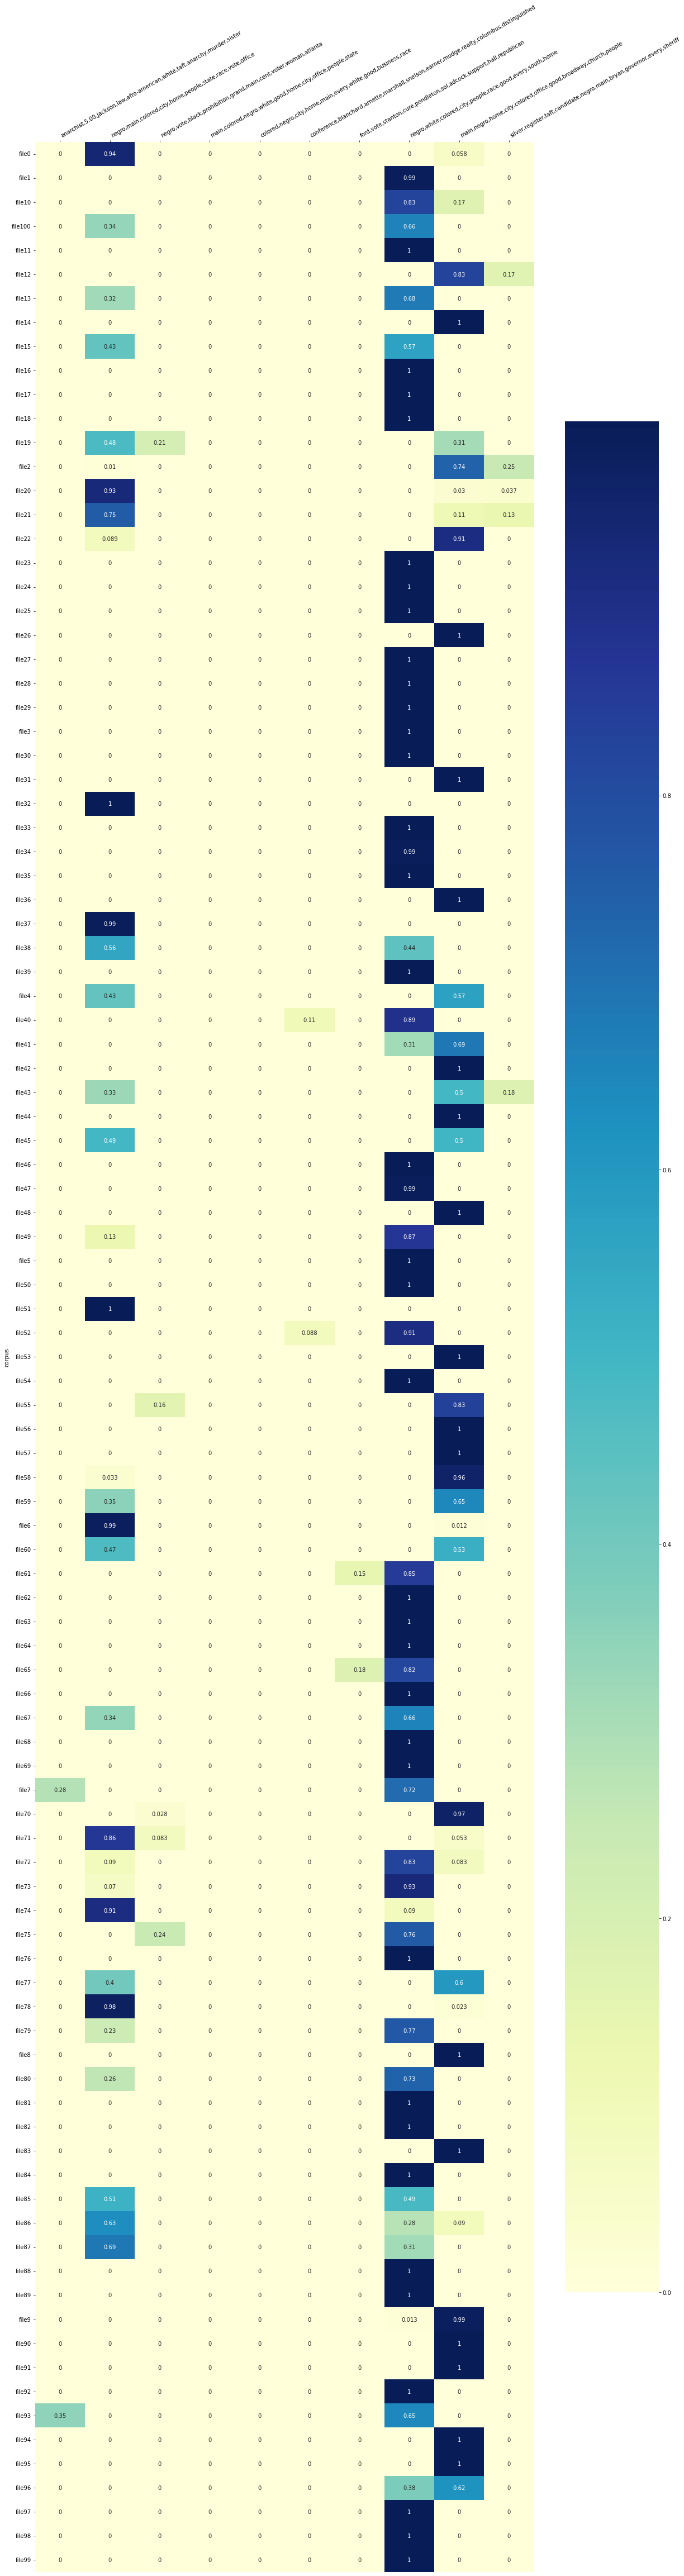

In [39]:
f, ax = plt.subplots(figsize=(20, 80))
ax = sns.heatmap(df_topic_words,
                 cmap="YlGnBu",
                 annot=True)
plt.tick_params(bottom=False, labelbottom=False, top=True, labeltop=True)
plt.xticks(rotation=30, ha='left')
plt.yticks(rotation=0)
plt.show()